In [1]:
%load_ext autoreload
%autoreload 2


In [24]:
import xarray as xr
from xarray import DataArray, Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
ds = xr.open_dataset('../../data/nc_2round/base.nc')


In [4]:
ds


<xarray.Dataset>
Dimensions:            (day: 1700, asset: 54, timeslot: 50)
Coordinates:
  * day                (day) int32 1 2 3 4 5 6 ... 1695 1696 1697 1698 1699 1700
  * asset              (asset) int32 0 1 2 3 4 5 6 7 ... 46 47 48 49 50 51 52 53
  * timeslot           (timeslot) int32 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
Data variables: (12/14)
    open               (day, asset, timeslot) float64 ...
    close              (day, asset, timeslot) float64 ...
    high               (day, asset, timeslot) float64 ...
    low                (day, asset, timeslot) float64 ...
    volume             (day, asset, timeslot) float64 ...
    money              (day, asset, timeslot) float64 ...
    ...                 ...
    pe_ttm             (day, asset) float64 ...
    pe                 (day, asset) float64 ...
    pb                 (day, asset) float64 ...
    ps                 (day, asset) float64 ...
    pcf                (day, asset) float64 ...
    return             (day, asset) float64 ...

In [10]:
selection_arr = ds.pe < 20
selection = [np.where(selection_arr.sel(day=day))[0] for day in range(1, 1701)]


In [16]:
s = selection[528]

In [60]:
_bucket_close = ds['close'].sel(day=range(586, 596)).stack({'bucket': ('day', 'timeslot')})
_bucket_return = _bucket_close.diff(dim='bucket') / _bucket_close


In [62]:
_bucket_return

<xarray.DataArray 'close' (asset: 54, bucket: 499)>
array([[ 0.00189202,  0.00377493, -0.00189363, ..., -0.00180436,
         0.        ,  0.        ],
       [-0.01732694,  0.0028135 ,  0.00519604, ...,  0.00194131,
         0.00077656, -0.00077716],
       [ 0.00065844,  0.00460408,  0.00065497, ...,  0.00253575,
        -0.00126949,  0.        ],
       ...,
       [ 0.        ,  0.00438067, -0.0022042 , ...,  0.        ,
         0.        , -0.00209399],
       [ 0.00667598,  0.00266693, -0.00535877, ...,  0.        ,
        -0.00383321, -0.00042844],
       [ 0.00266802,  0.01834077,  0.00521087, ...,  0.        ,
        -0.00149737,  0.        ]])
Coordinates:
  * asset     (asset) int32 0 1 2 3 4 5 6 7 8 9 ... 45 46 47 48 49 50 51 52 53
  * bucket    (bucket) object MultiIndex
  * day       (bucket) int32 586 586 586 586 586 586 ... 595 595 595 595 595 595
  * timeslot  (bucket) int32 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50

In [85]:
pca = PCA()
X_train = _bucket_return.as_numpy()[:, :400].T
X_test = _bucket_return.as_numpy()[:, 400:].T
pca.fit(X_train)


PCA()

In [86]:
print(pca.mean_)


[ 8.25973226e-05 -7.95310872e-06  8.98430614e-05  1.64234762e-04
  7.01307015e-05  6.15263191e-05  7.09345020e-05  1.59104445e-04
  1.27492517e-04  7.52586121e-05  2.48576112e-04  1.21628617e-05
  1.21494859e-04  9.49057403e-05  8.97198376e-05  1.70532375e-04
  1.25143433e-04  6.71346746e-05  1.12952554e-04 -2.91415570e-04
  1.80690053e-04  2.53052589e-05 -1.12578274e-04 -3.75811906e-05
  5.81966021e-05  2.05103098e-05  1.43256917e-05  1.13122861e-04
  6.66762904e-05  3.04747013e-05  1.06456571e-04  6.70348565e-05
  1.62493175e-04  8.20691467e-05  2.47577378e-06  1.10118533e-04
  7.79029847e-05  1.38863966e-04  2.61360440e-04  9.22481203e-05
  8.18169162e-05 -1.86055546e-05  1.01242884e-04 -8.16273614e-06
  4.11370396e-05  1.91084452e-04  2.23536347e-05  2.96538392e-05
 -9.33441268e-06 -6.63069712e-05  1.13178044e-04  9.37460632e-05
  7.26848551e-05  4.03097744e-04]


[0.20298448 0.25087287 0.28989281 0.32461728 0.35554848 0.38421
 0.41150961 0.43805151 0.46388704 0.48783683]


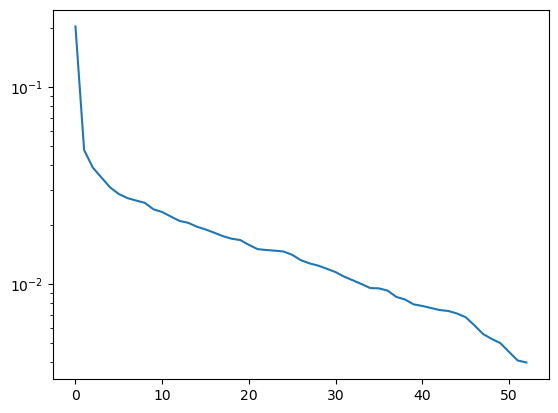

In [87]:
plt.semilogy(pca.explained_variance_ratio_[:-1])
print(np.cumsum(pca.explained_variance_ratio_)[:10])

In [88]:
pca.components_.shape


(54, 54)

In [89]:
X_train_transformed = pca.transform(X_train)


In [90]:
X_train_transformed[0, :]


array([-1.04956860e-02,  9.08083256e-03, -1.05013315e-02, -7.80090942e-03,
        1.87463065e-03,  9.03738869e-03,  1.36212767e-02, -4.29932522e-03,
       -6.71630532e-03,  1.64933394e-03,  6.84356879e-03, -1.00640756e-02,
       -5.33378015e-03, -2.76245570e-03, -4.72221203e-03,  6.58642845e-03,
       -3.70744010e-03,  6.82261872e-03,  4.14312374e-03, -1.61040494e-03,
        4.02852381e-03, -2.32644820e-03,  2.95057389e-03, -2.63281669e-03,
        3.37282640e-03,  5.58344435e-04,  6.63228876e-03, -2.09609524e-03,
       -2.47905259e-03, -6.23775029e-03, -1.62514241e-05, -2.88361967e-03,
        1.67659197e-04,  8.61861274e-04, -2.82384307e-03, -1.93774842e-03,
        2.20862077e-03,  3.87178507e-04,  9.70908195e-04,  3.09531041e-03,
        2.46463132e-03,  4.79239140e-04,  1.33217427e-03, -1.48856057e-04,
        2.54115225e-03,  1.41212087e-03, -1.50024673e-04,  7.27037336e-04,
       -1.91201052e-03,  4.39227531e-04,  2.78966921e-03, -1.99876042e-03,
        2.34176165e-04, -

In [121]:
pca5 = PCA(n_components=10, whiten=True)
X_train_weight = pca5.fit_transform(X_train)
X_train_principle = pca5.inverse_transform(X_train_weight)

In [122]:
res_train = X_train - X_train_principle

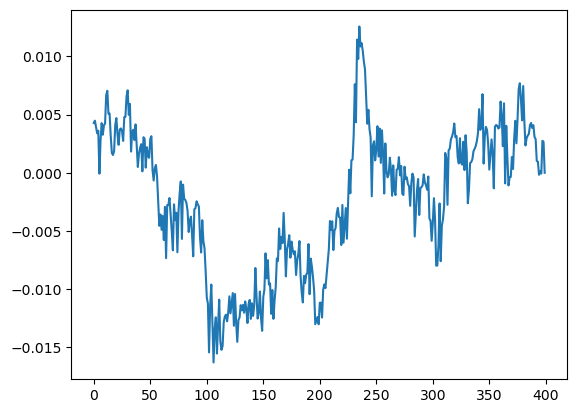

In [124]:
plt.plot(res_train[:, 4].cumsum())

In [125]:
X_test_weight = pca5.transform(X_test)
X_test_principle = pca5.inverse_transform(X_test_weight)
res_test = X_test - X_test_principle

In [126]:
total_res = np.concatenate([res_train, res_test])

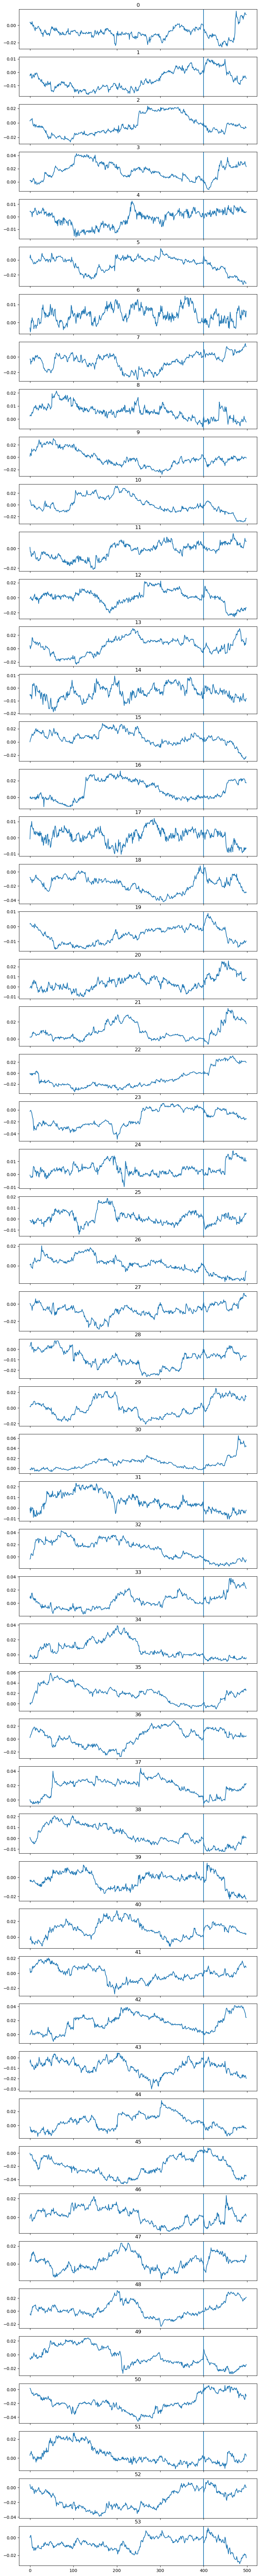

In [129]:
fig, axs = plt.subplots(54, 1, figsize=(10, 108), sharex=True)
for a in range(54):
    axs[a].plot(total_res[:, a].cumsum())
    axs[a].axvline(400)
    axs[a].set(title=f'{a}')

## Give a try to PCA

In [168]:
def extract_feature_and_target(ds, day, lookback=10, n_components=10):
    _bucket_close = ds['close'].sel(day=range(day-lookback-1, day+3)).stack({'bucket': ('day', 'timeslot')})
    _bucket_return = np.log(_bucket_close.diff(dim='bucket') / _bucket_close + 1)
    
    pca = PCA(n_components=n_components, whiten=True)
    A = np.concatenate([np.zeros((54, 1)), _bucket_return.to_numpy()], axis=1)
    X_train = A[:, :lookback*50].T
    X_test = A[:, lookback*50:].T
    
    X_train_weight = pca.fit_transform(X_train)
    X_train_principle = pca.inverse_transform(X_train_weight)
    res_train = X_train - X_train_principle
    
    X_test_weight = pca.transform(X_test)
    X_test_principle = pca.inverse_transform(X_test_weight)
    res_test = X_test - X_test_principle

    d = dict()
    for i in range(lookback):
        d[f'res_ret_{lookback-i-1}'] = res_train[i*50:(i+1)*50, :].sum(axis=0)
    d['2_res_ret'] = res_test.sum(axis=0)
    
    df = pd.DataFrame(d)
    df['day'] = day
    df.reset_index(inplace=True, names='asset')
    return df

In [173]:
df = pd.concat([extract_feature_and_target(ds, day) for day in range(500, 600)])

In [175]:
df = df.set_index(['day', 'asset'])

In [176]:
df

res_ret_9  res_ret_8  res_ret_7  res_ret_6  res_ret_5  res_ret_4  \
day asset                                                                     
500 0       0.022389  -0.014944  -0.013644   0.005278   0.003780  -0.005041   
    1       0.005121   0.002672   0.011380  -0.012032   0.009477  -0.011484   
    2      -0.000577   0.008063  -0.007267   0.029636  -0.005514  -0.011720   
    3      -0.003032   0.000922  -0.002913   0.008521  -0.000446  -0.006889   
    4      -0.000597   0.010408  -0.000123   0.008271  -0.008394  -0.003949   
...              ...        ...        ...        ...        ...        ...   
599 49     -0.002096  -0.002751  -0.012313   0.009006  -0.009939  -0.000771   
    50     -0.004784  -0.017357  -0.000777   0.008218   0.002639   0.013107   
    51     -0.006551  -0.008495   0.000369   0.008208  -0.000916   0.008880   
    52      0.004760   0.024282  -0.022463  -0.007040   0.035852  -0.008395   
    53      0.005060  -0.001341  -0.000084   0.010195   0.002329   0.000946   

           res_ret_3  res_ret_2  res_ret_1  res_ret_0  2_res_ret  
day asset                                                         
500 0       0.010378   0.004182  -0.030605   0.018227   0.013180  
    1      -0.019007  -0.013689   0.019579   0.007983   0.017481  
    2       0.002214   0.009964  -0.002390  -0.022408  -0.007254  
    3       0.024414   0.017096  -0.010028  -0.027645   0.002937  
    4      -0.005973   0.001160   0.007291  -0.008093  -0.007437  
...              ...        ...        ...        ...        ...  
599 49     -0.011237   0.011251  -0.003242   0.022092   0.070510  
    50     -0.001173  -0.006784  -0.008828   0.015739  -0.022857  
    51     -0.003942   0.007145   0.010708  -0.015406   0.019446  
    52     -0.003653   0.014031  -0.016579  -0.020794   0.007382  
    53     -0.000274  -0.002014  -0.004840  -0.009977   0.006296  

[5400 rows x 11 columns]

In [179]:
f_df = ds.sel(day=range(500, 600))[['pe', 'pcf', 'pb', 'ps']].to_dataframe()

In [180]:
big_df = pd.concat([df, f_df], axis=1)

In [181]:
big_df

res_ret_9  res_ret_8  res_ret_7  res_ret_6  res_ret_5  res_ret_4  \
day asset                                                                     
500 0       0.022389  -0.014944  -0.013644   0.005278   0.003780  -0.005041   
    1       0.005121   0.002672   0.011380  -0.012032   0.009477  -0.011484   
    2      -0.000577   0.008063  -0.007267   0.029636  -0.005514  -0.011720   
    3      -0.003032   0.000922  -0.002913   0.008521  -0.000446  -0.006889   
    4      -0.000597   0.010408  -0.000123   0.008271  -0.008394  -0.003949   
...              ...        ...        ...        ...        ...        ...   
599 49     -0.002096  -0.002751  -0.012313   0.009006  -0.009939  -0.000771   
    50     -0.004784  -0.017357  -0.000777   0.008218   0.002639   0.013107   
    51     -0.006551  -0.008495   0.000369   0.008208  -0.000916   0.008880   
    52      0.004760   0.024282  -0.022463  -0.007040   0.035852  -0.008395   
    53      0.005060  -0.001341  -0.000084   0.010195   0.002329   0.000946   

           res_ret_3  res_ret_2  res_ret_1  res_ret_0  2_res_ret       pe  \
day asset                                                                   
500 0       0.010378   0.004182  -0.030605   0.018227   0.013180  25.2690   
    1      -0.019007  -0.013689   0.019579   0.007983   0.017481  33.5414   
    2       0.002214   0.009964  -0.002390  -0.022408  -0.007254  37.8441   
    3       0.024414   0.017096  -0.010028  -0.027645   0.002937  19.9259   
    4      -0.005973   0.001160   0.007291  -0.008093  -0.007437  76.4536   
...              ...        ...        ...        ...        ...      ...   
599 49     -0.011237   0.011251  -0.003242   0.022092   0.070510  50.4331   
    50     -0.001173  -0.006784  -0.008828   0.015739  -0.022857  55.8485   
    51     -0.003942   0.007145   0.010708  -0.015406   0.019446   5.7697   
    52     -0.003653   0.014031  -0.016579  -0.020794   0.007382  28.3947   
    53     -0.000274  -0.002014  -0.004840  -0.009977   0.006296  23.9148   

                 pcf      pb      ps  
day asset                             
500 0        24.6030  3.1108  2.2855  
    1      1473.0555  5.7458  3.8391  
    2      4610.9410  6.7612  4.7429  
    3        10.9050  1.9844  0.7099  
    4       224.8657  2.9651  2.6324  
...              ...     ...     ...  
599 49      155.8044  3.9965  2.7671  
    50       14.2106  3.9533  2.0389  
    51       25.3831  2.4113  1.2178  
    52     -409.6337  6.9620  4.2616  
    53      -65.6598  4.7888  0.7950  

[5400 rows x 15 columns]

In [182]:
from sklearn.model_selection import TimeSeriesSplit

features = [f'res_ret_{i}' for i in range(10)] + ['pe', 'pcf', 'pb', 'ps']
print(features)
X = big_df[features].to_numpy()
y = big_df['2_res_ret'].to_numpy()

['res_ret_0', 'res_ret_1', 'res_ret_2', 'res_ret_3', 'res_ret_4', 'res_ret_5', 'res_ret_6', 'res_ret_7', 'res_ret_8', 'res_ret_9', 'pe', 'pcf', 'pb', 'ps']


In [184]:
from tqdm.auto import tqdm
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()

tscv = TimeSeriesSplit(100)
scores = np.zeros(99, 2)
for i, (train_index, test_index) in tqdm(enumerate(tscv.split(X))):
    regr.fit(X[train_index, :], y[train_index])
    scores[i, 0] = regr.score(X[train_index, :], y[train_index])
    scores[i, 1] = regr.score(X[train_index, :], y[train_index])